In [15]:
"""
Author Ziang, 9.2022
"""
import os 
import pandas as pd
import anndata
path = "singleCellData_and_label/singleCellData/"
label_path = "singleCellData_and_label/labels/"
adata_path = "singleCellData_and_label/adata/"
! mkdir -p $adata_path
for file in os.listdir(path)[:10]:
    print(file)
    adata = anndata.read_csv(path+file, delimiter='\t')
    adata = adata.transpose()
    mat = pd.read_csv(label_path+file+"_label",delimiter="\t")
    for col in mat.columns:
        adata.obs[col] = mat[col]
    adata.write(adata_path+file+".adata")

lake
grun
deng-rpkms
fan
usoskin
patel
camp1
manno_mouse
tasic-rpkms
romanov


In [66]:
def cal_score(adata,res = 1,ret_num = False):
    sc.pp.neighbors(adata, n_neighbors=10)
    sc.tl.leiden(adata,resolution=res)
    leiden_result = adata.obs["leiden"]
    cell_type1 = adata.obs['cell_type1']
    _, cell_type1_int = np.unique(cell_type1, return_inverse=True)
    # print("NMI",normalized_mutual_info_score(cell_type1_int, leiden_result),"ARI", adjusted_rand_score(cell_type1_int, leiden_result))
    ret = [normalized_mutual_info_score(cell_type1_int, leiden_result), adjusted_rand_score(cell_type1_int, leiden_result)]
    if ret_num:
        ret = ret + [len(np.unique(adata.obs['leiden']))]
    return ret

In [55]:
import scanpy as sc
import anndata
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

adata_path = "singleCellData_and_label/adata/"
result = {}
for file_name in os.listdir(adata_path):
    adata = anndata.read_h5ad("singleCellData_and_label/adata/"+file_name)
    # print(file_name)
    result[file_name] = cal_score(adata)
print(result)

{'patel.adata': [0.7440871586260658, 0.6413501217250052], 'lake.adata': [0.6865668599100857, 0.3294259673784791], 'tasic-rpkms.adata': [0.8165305450264023, 0.6163496878652964], 'fan.adata': [0.5274444957163996, 0.29692987248123115], 'usoskin.adata': [0.6292537284209706, 0.3565525318709324], 'camp1.adata': [0.8274677669747357, 0.6170106302566045], 'deng-rpkms.adata': [0.6810023863025186, 0.32060386438622457], 'grun.adata': [0.2720464363815273, 0.055385080610707384], 'romanov.adata': [0.48159975712953274, 0.23972677053931465], 'manno_mouse.adata': [0.5172617652154685, 0.24046779247532654]}


## Grun

In [16]:
grun_adata = anndata.read_h5ad("singleCellData_and_label/adata/"+'grun.adata')

In [17]:
sc.settings.verbosity = 3
sc.pp.neighbors(grun_adata)
sc.tl.umap(grun_adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:06)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [41]:
for i in range(1,30):
    res = i/30.0
    nmi,ars,num = cal_score(grun_adata,res = 1-res,ret_num=True)
    if num==2:
        print(1-res)
        print(nmi,ars)
        break

print(cal_score(grun_adata,res =1 ,ret_num=True))

0.033333333333333326
0.8775975289117136 0.9453961549696214
[0.2720464363815273, 0.055385080610707384, 19]


In [44]:
print(cal_score(grun_adata,res =1 ,ret_num=True))
print(cal_score(grun_adata,res =0.5 ,ret_num=True))
print(cal_score(grun_adata,res =0.1 ,ret_num=True))
print(cal_score(grun_adata,res =0.05 ,ret_num=True))
print(cal_score(grun_adata,res =0.03 ,ret_num=True))

[0.2720464363815273, 0.055385080610707384, 19]
[0.3041785378105262, 0.0831699979301077, 13]
[0.48176537503529465, 0.2809042266738571, 4]
[0.6302754222840625, 0.5638810990191606, 3]
[0.8775975289117136, 0.9453961549696214, 2]


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


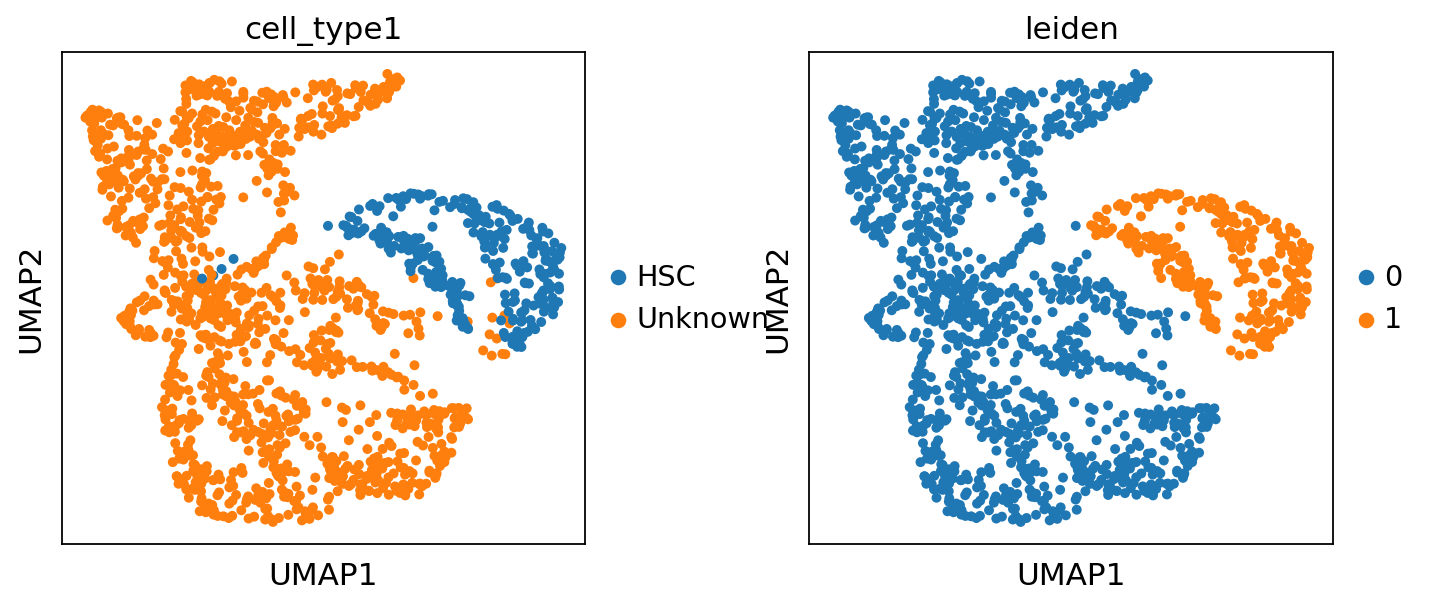

In [53]:
sc.pl.umap(grun_adata,color=['cell_type1','leiden'],wspace=0.3)

## Deng-rpkms

In [87]:
deng_adata = anndata.read_h5ad("singleCellData_and_label/adata/"+'deng-rpkms.adata')
sc.settings.verbosity = 3
sc.pp.neighbors(deng_adata)
sc.tl.umap(deng_adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:01)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


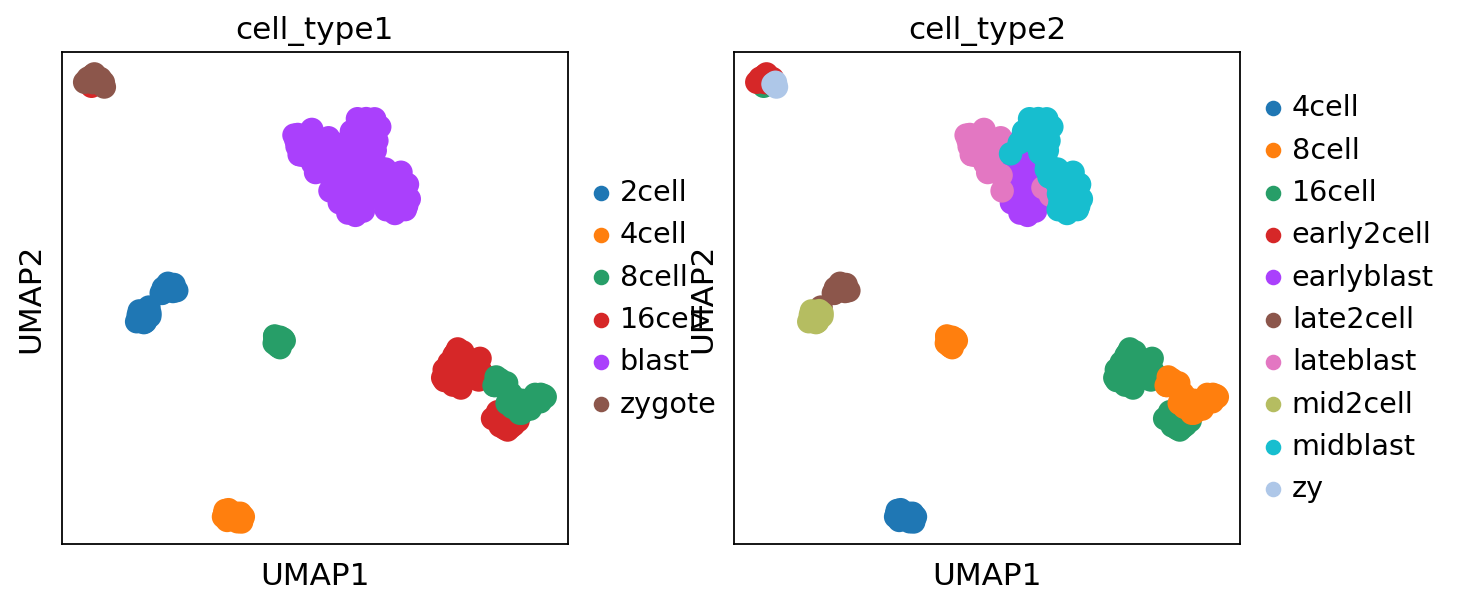

In [59]:
sc.pl.umap(deng_adata,color=['cell_type1','cell_type2'])

[0.8801978264881071, 0.9115850757345655, 7]


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


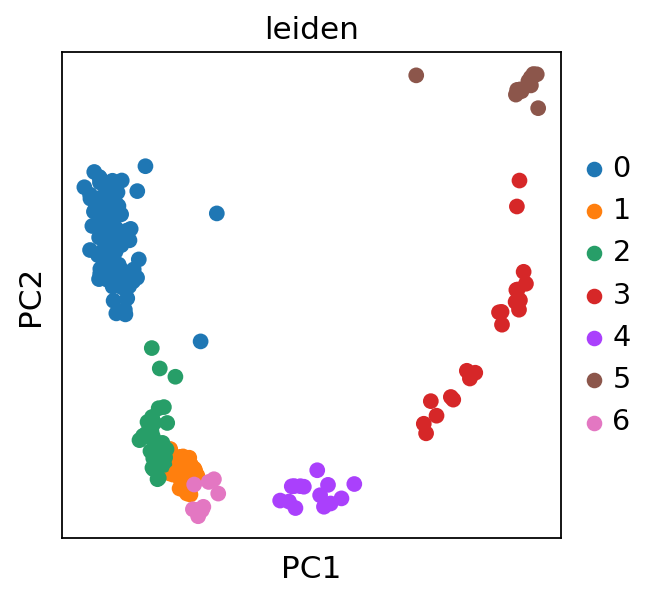

In [96]:
sc.settings.verbosity = 0  
print(cal_score(deng_adata,res =0.2 ,ret_num=True))
sc.pl.pca(deng_adata,size=200,color=['leiden'])

In [104]:
print(cal_score(deng_adata,res =1 ,ret_num=True))

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
[0.6810023863025186, 0.32060386438622457, 13]


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


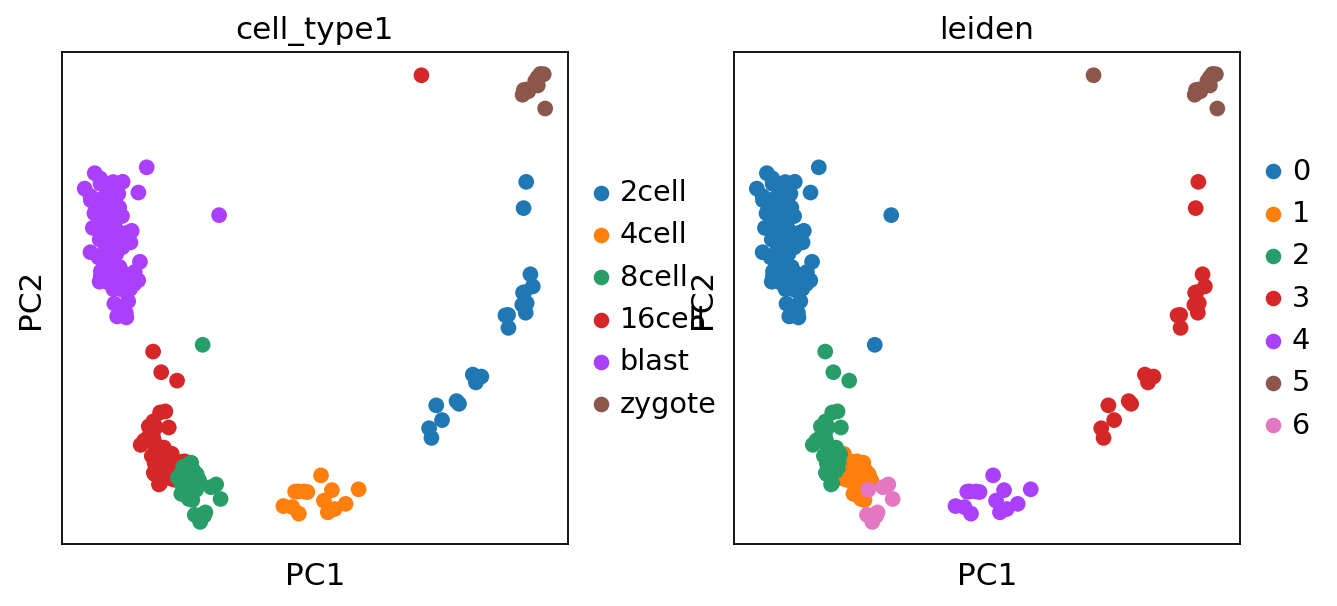

In [98]:
# sc.tl.pca(deng_adata)
# sc.pl.pca(deng_adata,size=200,color=['cell_type1','cell_type2'])
sc.pl.pca(deng_adata,size=200,color=['cell_type1','leiden'])

## Fan

In [ ]:
fan_adata = anndata.read_h5ad("singleCellData_and_label/adata/"+'fan.adata')
sc.settings.verbosity = 3
sc.pp.neighbors(fan_adata)


computing PCA
    with n_comps=50
    finished (0:00:00)


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


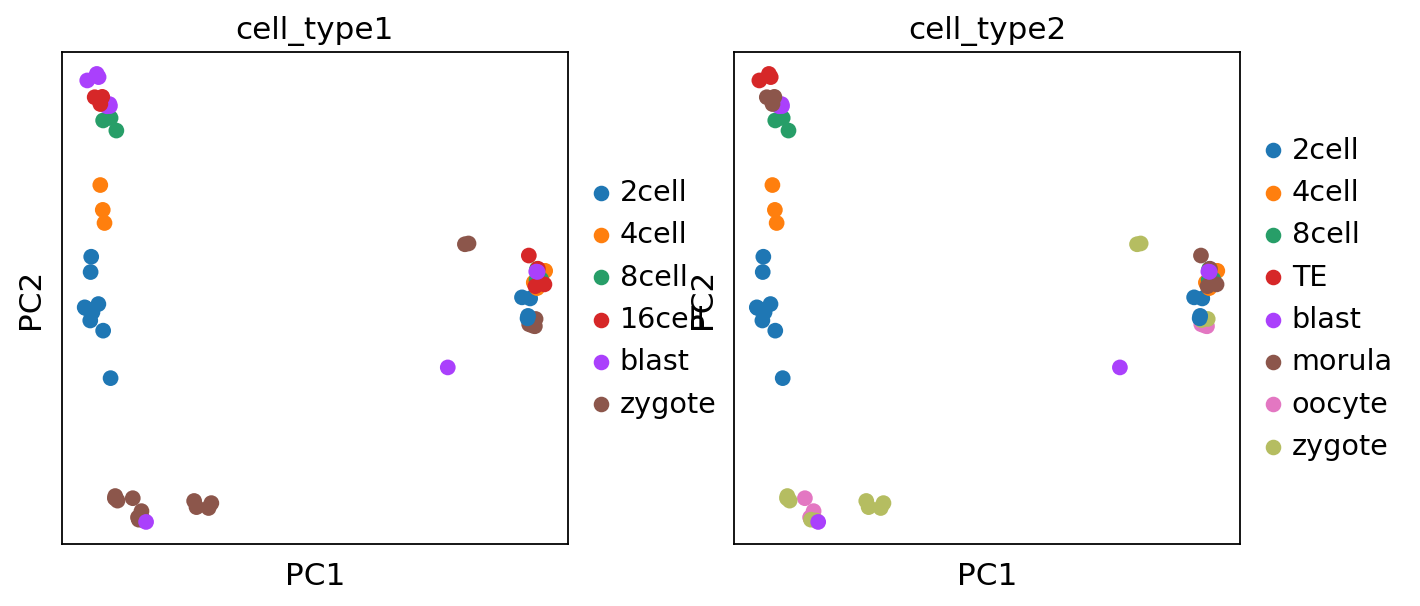

In [85]:
sc.tl.pca(fan_adata)
sc.pl.pca(fan_adata,size=200, color=['cell_type1','cell_type2'])

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:02:27)


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


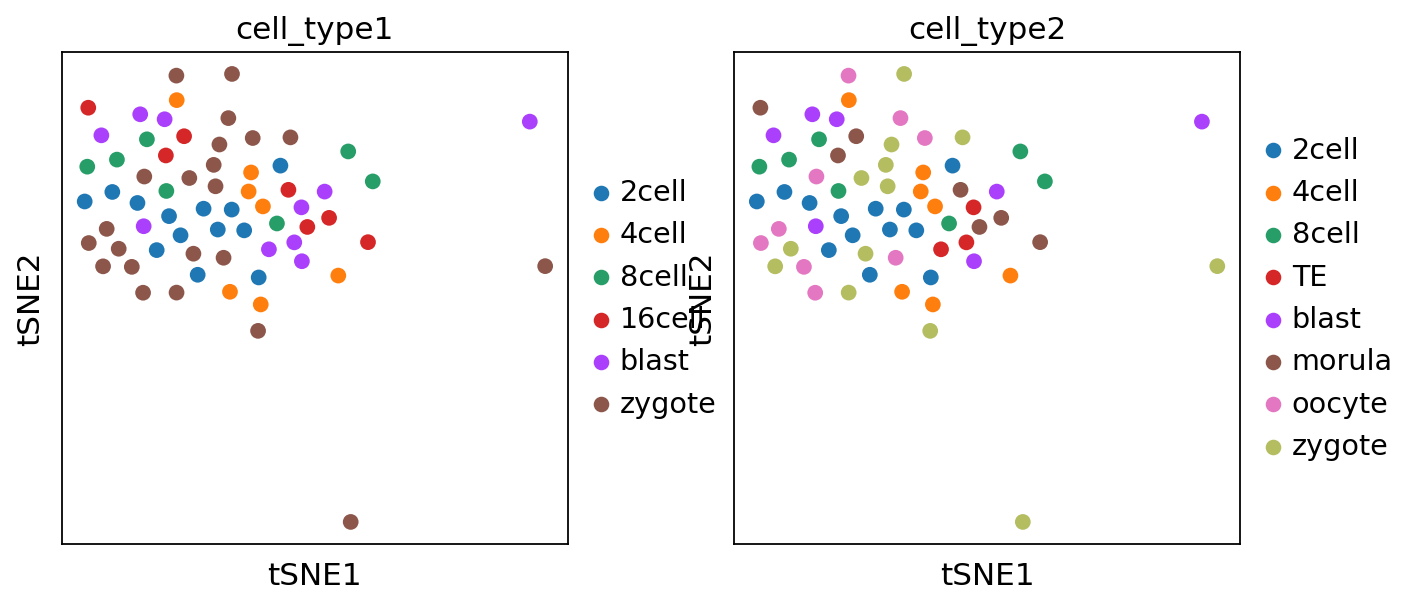

In [84]:
sc.tl.tsne(fan_adata)
sc.pl.tsne(fan_adata,size=200, color=['cell_type1','cell_type2'])

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


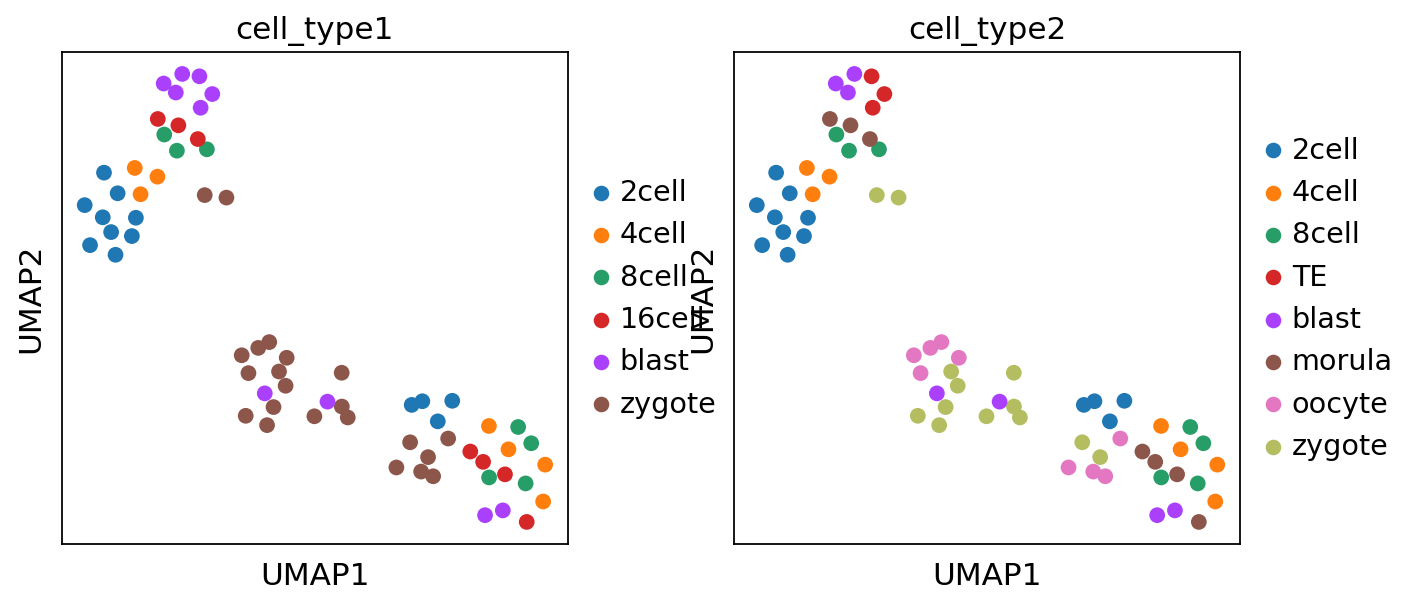

In [86]:
sc.tl.umap(fan_adata)
sc.pl.umap(fan_adata,size=200, color=['cell_type1','cell_type2'])

## manno_mouse

In [100]:
manno_adata = anndata.read_h5ad("singleCellData_and_label/adata/"+'manno_mouse.adata')
sc.settings.verbosity = 3
sc.pp.neighbors(manno_adata)


computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:06)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


computing PCA
    with n_comps=50
    finished (0:00:06)


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


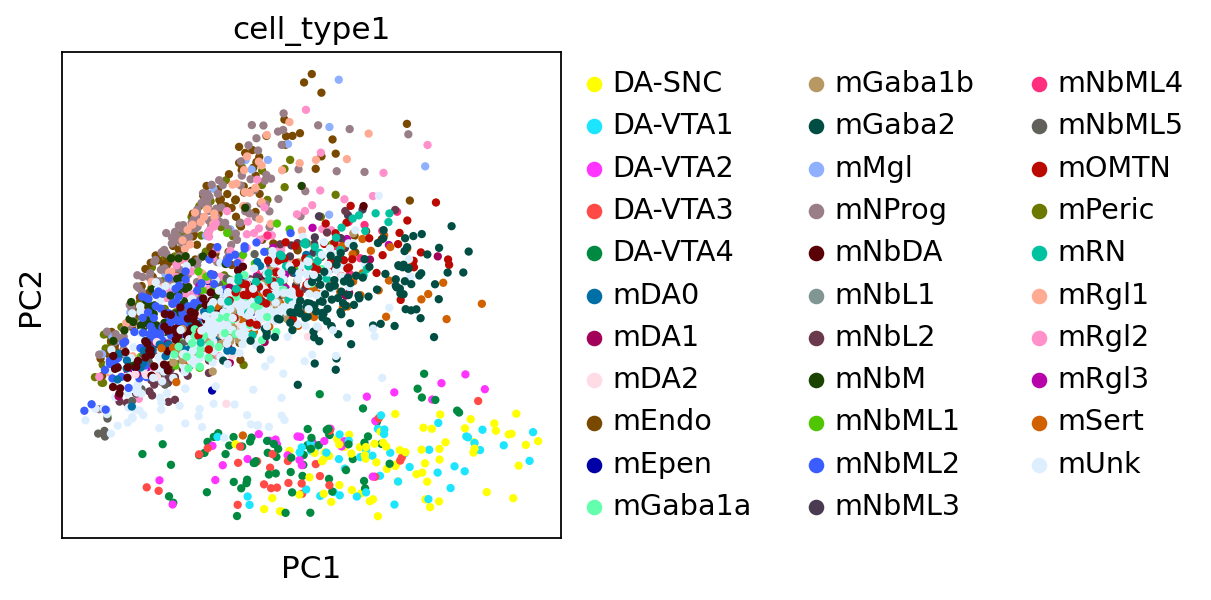

In [102]:
sc.tl.pca(manno_adata)
sc.pl.pca(manno_adata, color=['cell_type1'])

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


/data/ziang/miniconda3/envs/sing/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


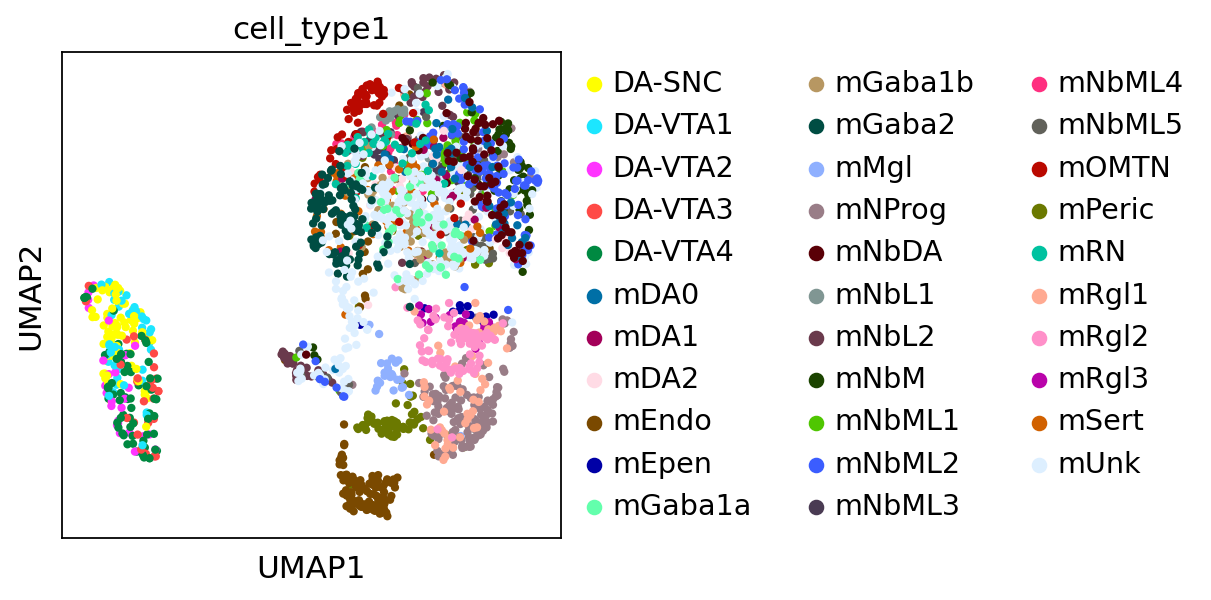

In [103]:
sc.tl.umap(manno_adata)
sc.pl.umap(manno_adata, color=['cell_type1'])